### Imports


In [50]:
import numpy as np
import pandas as pd


### Read CSV


In [51]:
data = pd.read_csv('datasets/epl-standings-2010-2021.csv').sort_values('Pts')
data.head()

,Season,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts,Qualification or relegation
179,2018-19,20,Huddersfield Town,38,3,7,28,22,76,-54,16,Relegation to the EFL Championship
119,2015-16,20,Aston Villa,38,3,8,27,27,76,-49,17,Relegation to the EFL Championship
199,2019-20,20,Norwich City,38,5,6,27,26,75,-49,21,Relegation to the EFL Championship
219,2020-21,20,Sheffield United,38,7,2,29,20,63,-43,23,Relegation to the EFL Championship
139,2016-17,20,Sunderland,38,6,6,26,29,69,-40,24,Relegation to the EFL Championship


# Matplotlib


In [52]:
import matplotlib.pyplot as plt

## Scatter Plot

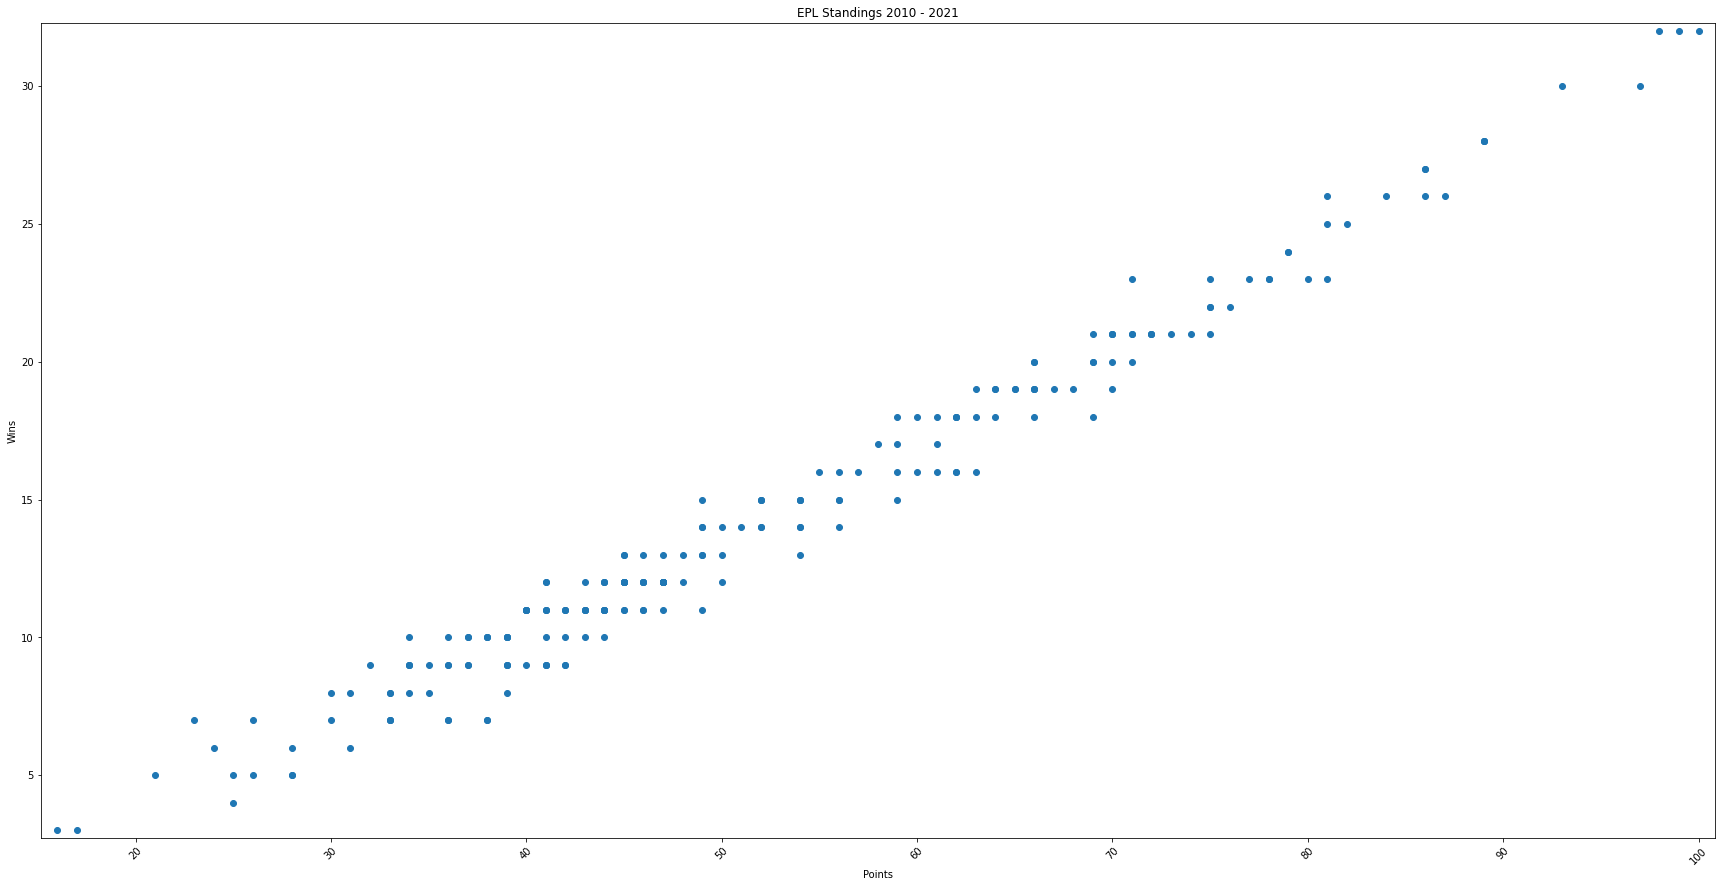

In [53]:
fig, ax = plt.subplots(figsize=(30, 15))

# plt.tight_layout()	# Best Layout

ax.scatter(data['Pts'], data['W'])  # Plotting Data

ax.set_title('EPL Standings 2010 - 2021')  # Labels
ax.set_xlabel('Points')
ax.set_ylabel('Wins')

plt.xticks(rotation=45)  # Rotating X Values by 45 deg

plt.margins(0.01)  # Set Margins
plt.show()


### With Colors


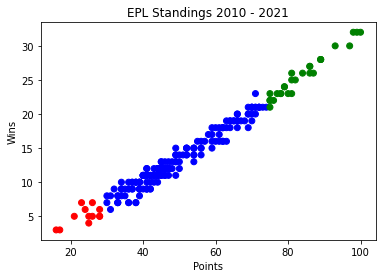

In [54]:
fig, ax = plt.subplots()

color = []
for i in data['Pts']:
    if i < 30:
        color.append('red')
    elif i >= 25 and i < 75:
        color.append('blue')
    elif i >= 75 and i <= 100:
        color.append('green')

ax.scatter(data['Pts'], data['W'], color=color)

ax.set_title('EPL Standings 2010 - 2021')
ax.set_xlabel('Points')
ax.set_ylabel('Wins')
plt.show()

## Line Graph

### Comparing ManU & ManC Performance

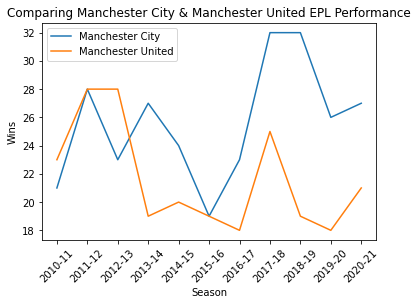

In [55]:
man_c = data[(data == 'Manchester City').any(axis=1)].sort_values('Season')
man_u = data[(data == 'Manchester United').any(axis=1)].sort_values('Season')

fig, ax = plt.subplots()

ax.plot(man_c['Season'], man_c['W'], label='Manchester City')
ax.plot(man_u['Season'], man_u['W'], label='Manchester United')

plt.xticks(rotation=45)
ax.set_title('Comparing Manchester City & Manchester United EPL Performance')
ax.set_xlabel('Season')
ax.set_ylabel('Wins')
ax.legend()
plt.show()

## Histogram

### Frequency of matches played by a team

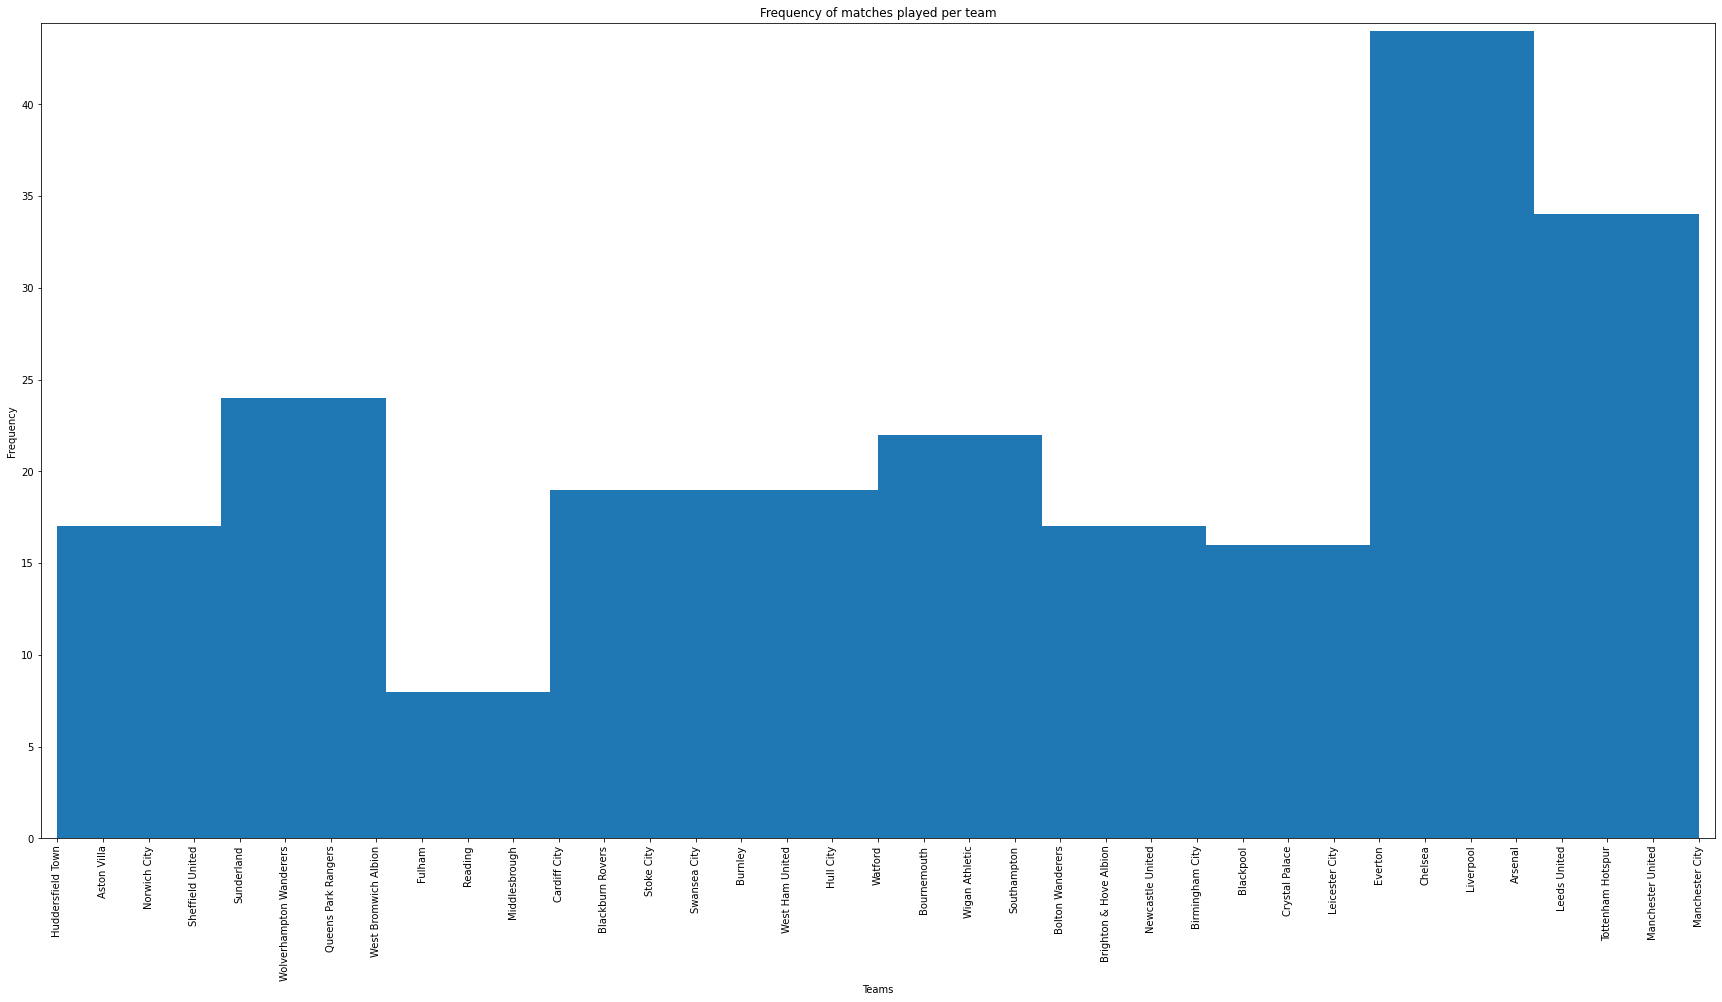

In [56]:
fig, ax = plt.subplots(figsize=(30, 15))
ax.hist(data['Team'])

plt.margins(0.01)
plt.xticks(rotation=90)
ax.set_title('Frequency of matches played per team')
ax.set_xlabel('Teams')
ax.set_ylabel('Frequency')
plt.show()

## Bar Graph

### Frequency of Wins per team across all seasons

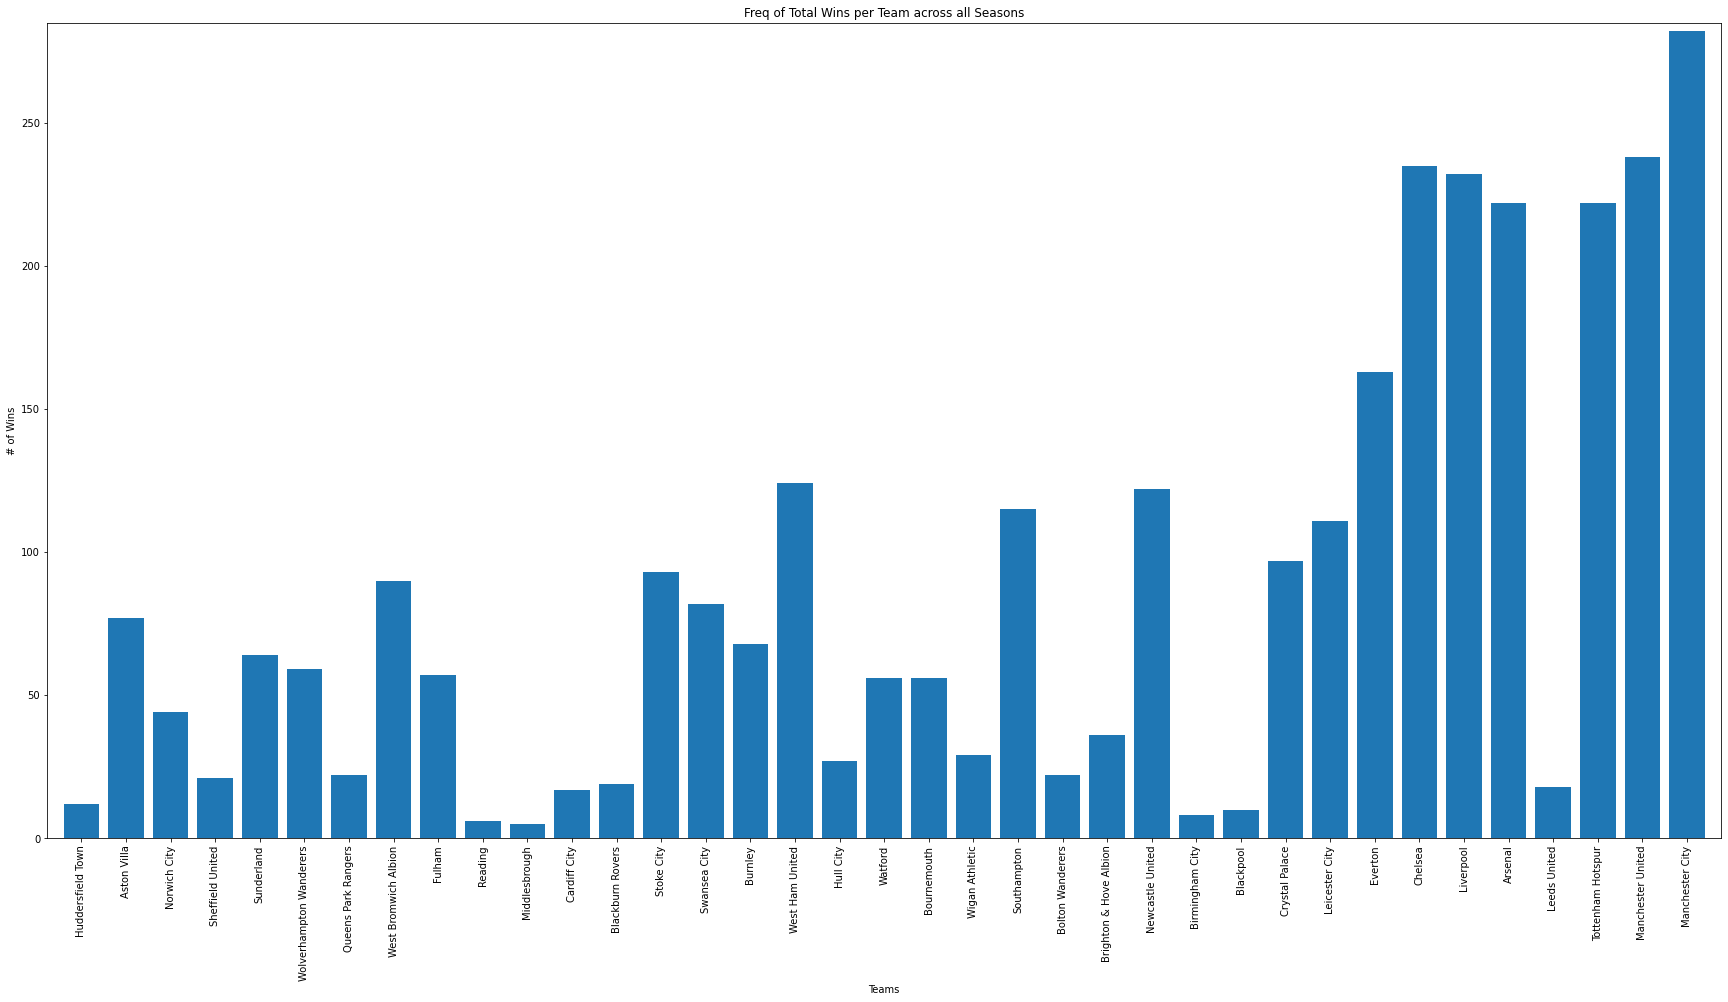

In [57]:
fig, ax = plt.subplots(figsize=(30, 15)) 

teams = data['Team'].unique() 
wins = []

for i in teams:
	t = data[(data == i).any(axis=1)]
	wins.append(t['W'].sum())

ax.bar(teams, wins) 

plt.margins(0.01)
plt.xticks(rotation=90)
ax.set_title('Freq of Total Wins per Team across all Seasons') 
ax.set_xlabel('Teams') 
ax.set_ylabel('# of Wins')
plt.show()

# Pandas

## Scatter Plot

<AxesSubplot:title={'center':'Wins vs Points'}, xlabel='Pts', ylabel='W'>

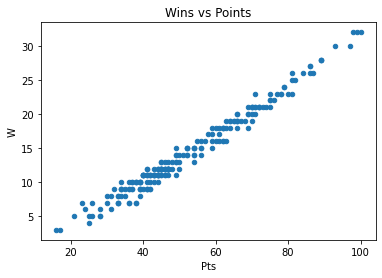

In [59]:
data.plot.scatter(x='Pts', y='W', title = 'Wins vs Points')

## Line Plot - Using default IRIS Dataset because I ran out of Ideas

<AxesSubplot:title={'center':'Iris Dataset'}>

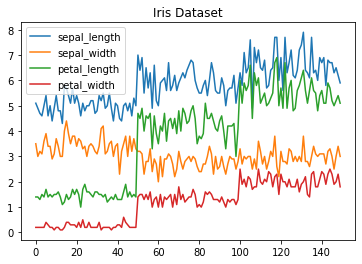

In [66]:
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
iris.drop(['species'], axis=1).plot.line(title='Iris Dataset')

## Histogram

<AxesSubplot:title={'center':'Points Frequency Histogram'}, ylabel='Frequency'>

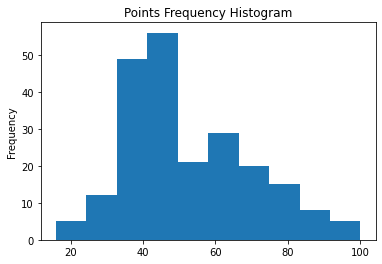

In [68]:
data['Pts'].plot.hist(title='Points Frequency Histogram')

### Multiple Histograms

array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>]], dtype=object)

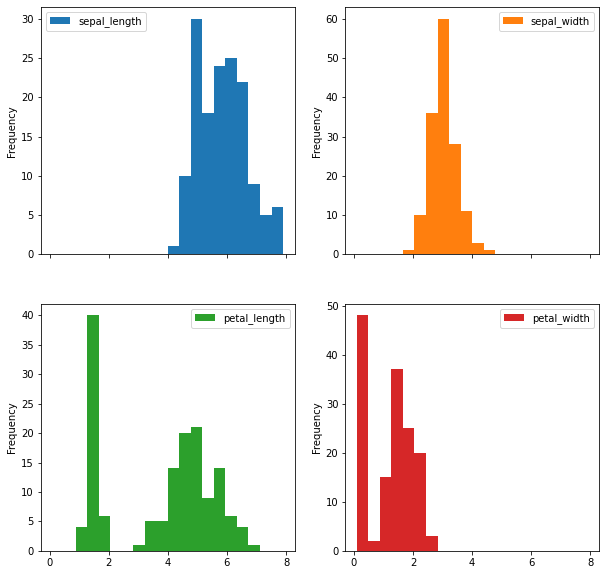

In [69]:
iris.plot.hist(subplots=True, layout=(2,2), figsize=(10, 10), bins=20)

## Bar Graph

<AxesSubplot:>

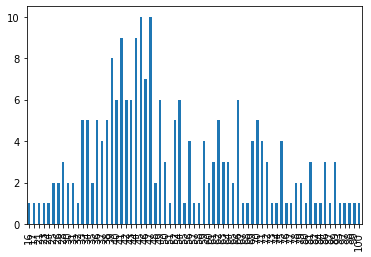

In [71]:
data['Pts'].value_counts().sort_index().plot.bar()

### Horizontal Bar Graph

<AxesSubplot:>

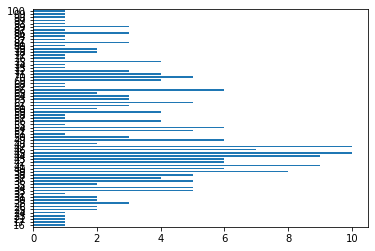

In [72]:
data['Pts'].value_counts().sort_index().plot.barh()

### Top 5 Teams with Max Mean Points

<AxesSubplot:xlabel='Team'>

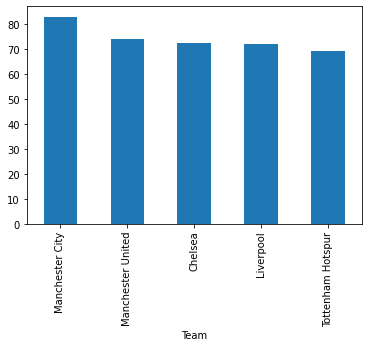

In [74]:
data.groupby('Team').Pts.mean().sort_values(ascending=False)[:5].plot.bar()